In [136]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import style
import matplotlib as mpl
%matplotlib inline
from sklearn.linear_model import LinearRegression
import numpy as np

In [54]:
style.use('fivethirtyeight')

In [197]:
df = pd.read_csv("../data/derived/complete_dataset.csv", parse_dates=['crash_time'])

In [56]:
# features indicates injury required hospital.
df['required_hospital'] = 0
df['required_hospital'][df['hospital'].str.contains('osf|bromenn|hospital')]=1

/home/mike/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


In [57]:
df_new = df[df.crash_time >= '2015-07-01']
df_old = df[df.crash_time < '2015-07-01']
mask_2014 = (df['crash_time'] >= '2014-01-01') & (df['crash_time'] <= '2014-12-31')
mask_2015 = (df['crash_time'] >= '2015-01-01') & (df['crash_time'] <= '2015-12-31')
mask_2016 = (df['crash_time'] >= '2016-01-01') & (df['crash_time'] <= '2016-12-31')

df_2014 = df[mask_2014]
df_2015 = df[mask_2015]
df_2016 = df[mask_2016]

/home/mike/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


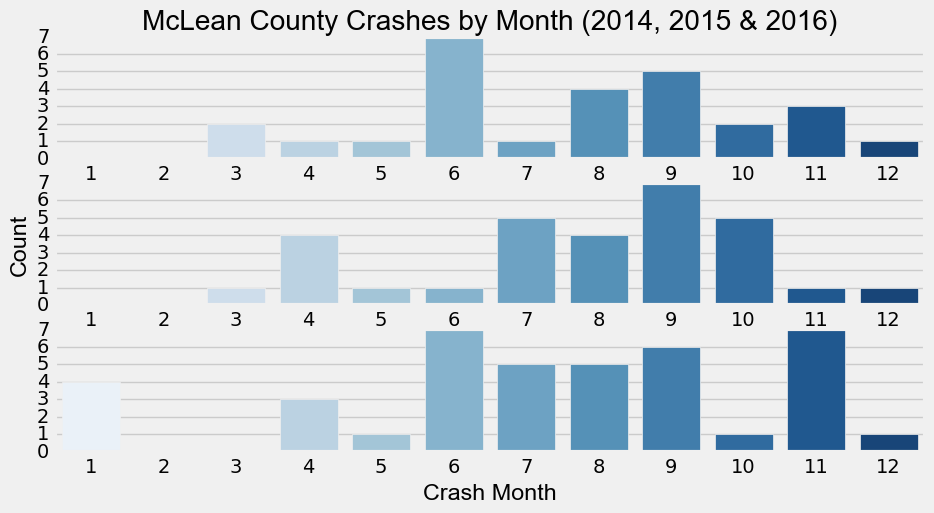

In [93]:
#visualize month
plt.figure(figsize=(10,5))
plt.subplot(311)
plt.title("McLean County Crashes by Month (2014, 2015 & 2016)")
sns.countplot(x=df_2014.crash_time.dt.month, palette="Blues", order =[1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel("")
plt.ylabel("")
plt.subplot(312)
sns.countplot(x=df_2015.crash_time.dt.month, palette="Blues", order =[1,2,3,4,5,6,7,8,9,10,11,12])
plt.xlabel("")
plt.ylabel("Count")
plt.subplot(313)
sns.countplot(x=df_2016.crash_time.dt.month, palette="Blues", order =[1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend()
plt.xlabel("Crash Month")
plt.ylabel("")
plt.show()



/home/mike/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


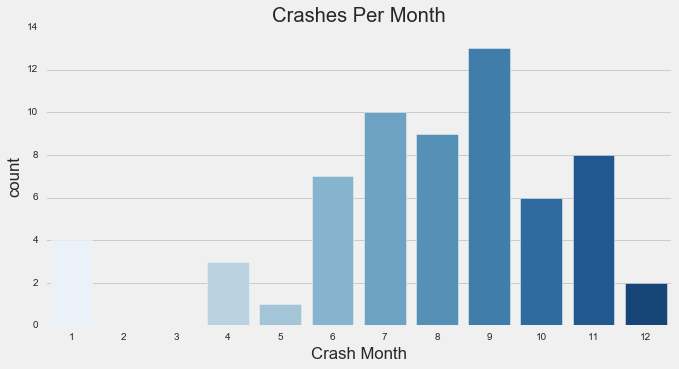

In [59]:
plt.figure(figsize=(10,5))
plt.title("Crashes Per Month")
sns.countplot(x=df_new.crash_time.dt.month, palette="Blues", order =[1,2,3,4,5,6,7,8,9,10,11,12])
plt.legend()
plt.xlabel("Crash Month")
plt.show()

/home/mike/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


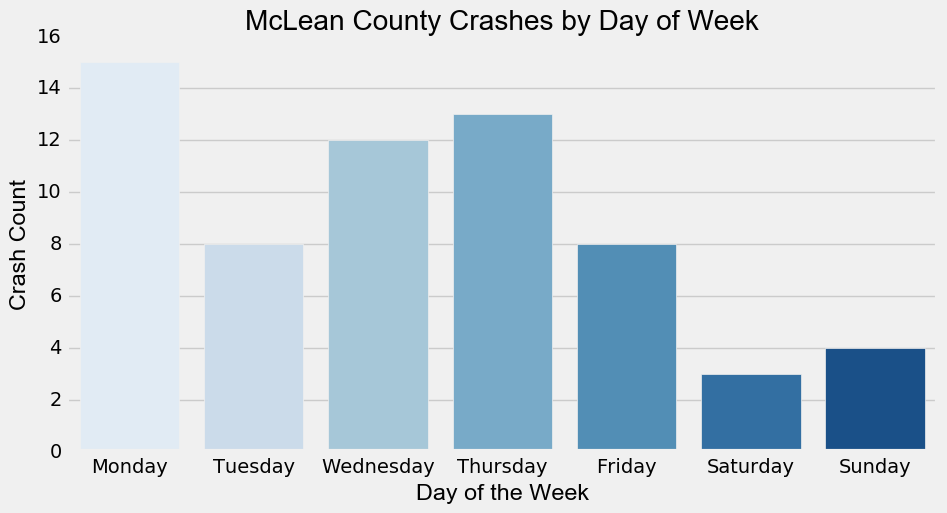

In [94]:
#visualize day
plt.figure(figsize=(10,5))
plt.title("McLean County Crashes by Day of Week")
sns.countplot(x=df_new.crash_time.dt.weekday, palette="Blues",  )
plt.xlabel("Day of the Week")
plt.xticks(range(7), ['Monday', 'Tuesday','Wednesday', 'Thursday','Friday','Saturday','Sunday'])
plt.ylabel("Crash Count")
plt.legend()

/home/mike/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


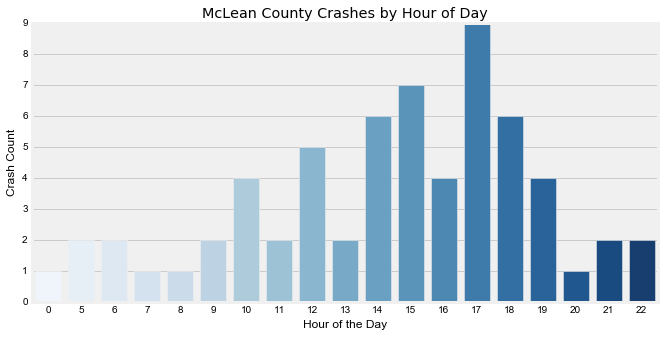

In [204]:
#visualize day
plt.figure(figsize=(10,5))
plt.title("McLean County Crashes by Hour of Day")
sns.countplot(x=df_new.crash_time.dt.hour, palette="Blues",  )
plt.xlabel("Hour of the Day")
plt.ylabel("Crash Count")
plt.legend()

/home/mike/anaconda/lib/python3.5/site-packages/matplotlib/axes/_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


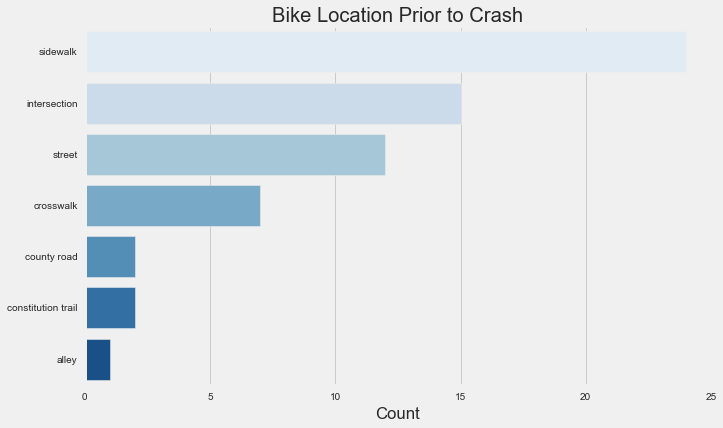

In [61]:
plt.figure(figsize=(10,6))
plt.title("Bike Location Prior to Crash")
sns.countplot( y=df_new.location_bike, palette="Blues", order=['sidewalk', 'intersection', 'street', 'crosswalk',
                                                               'county road', 'constitution trail', 'alley' ])
plt.ylabel("")
plt.xlabel("Count")
plt.legend()

In [62]:
grp_2016 = df_2016.groupby(df_2016.crash_time.dt.month)
grp_2015 = df_2015.groupby(df_2015.crash_time.dt.month)
grp_2014 = df_2014.groupby(df_2014.crash_time.dt.month)

In [63]:
df_delta = pd.DataFrame()
df_delta['2016_total'] = grp_2016.id.count()
df_delta['2015_total'] = grp_2015.id.count()
df_delta['2014_total'] = grp_2014.id.count()

df_delta['change_2016'] = df_delta['2016_total'] - df_delta['2015_total']
df_delta['change_2015'] = df_delta['2015_total'] - df_delta['2014_total']

df_delta['2016_req_hospital'] = grp_2016.required_hospital.sum()
df_delta['2015_req_hospital'] = grp_2015.required_hospital.sum()
df_delta['2014_req_hospital'] = grp_2014.required_hospital.sum()

df_delta['change_2016_req_hospital'] = df_delta['2016_req_hospital'] - df_delta['2015_req_hospital']
df_delta['change_2015_req_hospital'] = df_delta['2015_req_hospital'] - df_delta['2014_req_hospital']

df_delta = df_delta.fillna(value=0)

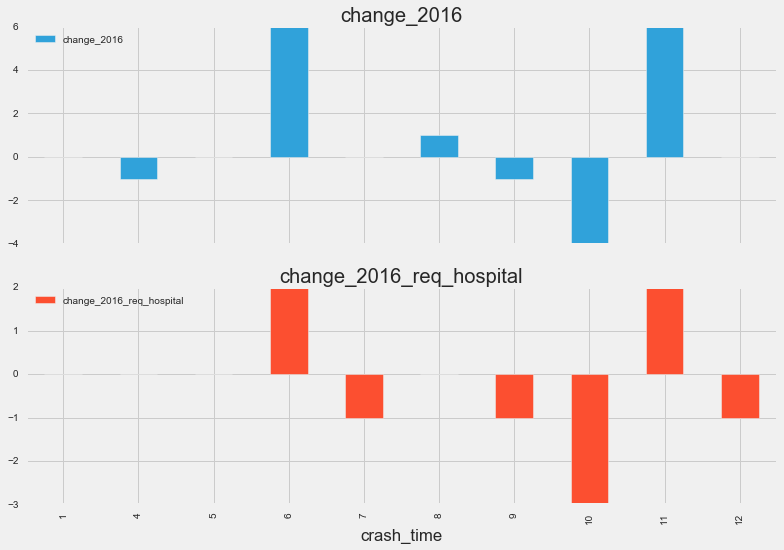

In [68]:
df_delta[['change_2016', 'change_2016_req_hospital']].plot(kind='bar', subplots=True, figsize=(12,8))
plt.show()

In [69]:
df_2016.shape

(40, 28)

In [70]:
df_2015.shape

(30, 28)

In [71]:
10/30

0.3333333333333333

In [72]:
df_2014.shape

(27, 28)

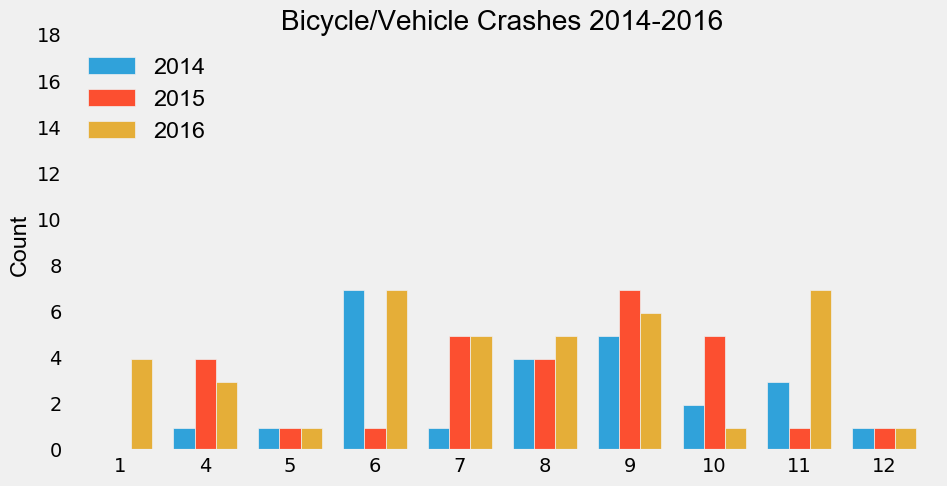

In [89]:
# Setting the positions and width for the bars
pos = list(range(len(df_delta['2016_total'])))
width = 0.25

# Plotting the bars
fig, ax = plt.subplots(figsize=(10,5))

# Create a bar with pre_score data,
# in position pos,
plt.bar(pos,
        #using df['pre_score'] data,
        df_delta['2014_total'],
        # of width
        width,
        # with alpha 0.5
        #alpha=0.5,
        # with color
        color='#30a2da',
        # with label the first value in first_name
        label="2014")

# Create a bar with mid_score data,
# in position pos + some width buffer,
plt.bar([p + width for p in pos],
        #using df['mid_score'] data,
        df_delta['2015_total'],
        # of width
        width,
        # with alpha 0.5
        #alpha=0.5,
        # with '#fc4f30'color
        color='#fc4f30',
        # with label the second value in first_name
        label="2015")

# Create a bar with post_score data,
# in position pos + some width buffer,
plt.bar([p + width*2 for p in pos],
        #using df['post_score'] data,
        df_delta['2016_total'],
        # of width
        width,
        # with alpha 0.5
        #alpha=0.5,
        # with color
        color='#e5ae38',
        # with label the third value in first_name
        label="2016")

# Set the y axis label
ax.set_ylabel('Count')

# Set the chart's title
ax.set_title('Bicycle/Vehicle Crashes 2014-2016')

# Set the position of the x ticks
ax.set_xticks([p + 1.5 * width for p in pos])

# Set the labels for the x ticks
ax.set_xticklabels(df_delta.index)

# Setting the x-axis and y-axis limits
plt.xlim(min(pos)-width, max(pos)+width*4)
plt.ylim([0, max(df_delta['2014_total'] + df_delta['2015_total'] + df_delta['2016_total'])] )

# Adding the legend and showing the plot
plt.legend(['2014', '2015', '2016'], loc='upper left')
plt.grid()
plt.show()

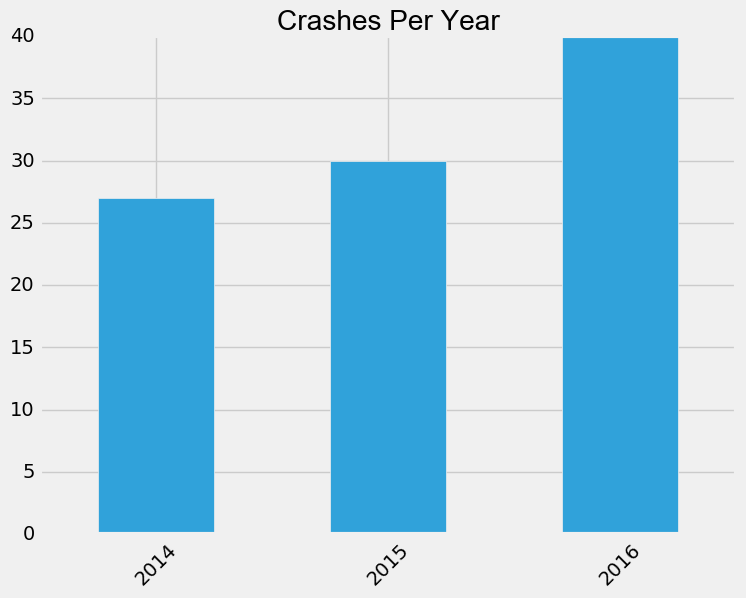

In [115]:
crash_per_year = pd.Series({"2014": df_2014.shape[0], "2015": df_2015.shape[0], "2016": df_2016.shape[0] })
crash_per_year.plot(kind='bar', rot=45, title="Crashes Per Year")

In [116]:
crash_per_year

2014    27
2015    30
2016    40
dtype: int64

##  We need to normalize this by population to see if things are really increasing
*  projected 2017 176,605
* 2015 175,890
* 2012  171,166

Building a really simple linear model to predict population

In [152]:
pop = pd.DataFrame({"population":[176605, 175890, 171166], "year":[2017, 2015, 2012] })
lm = LinearRegression()
lm.fit(X=pop.year.values.reshape(-1, 1), y = pop.population.values.reshape(-1, 1))
populations = lm.predict(np.array([2014, 2015, 2016]).reshape(-1, 1))

In [153]:
populations

array([[ 173802.84210526],
       [ 174929.07894737],
       [ 176055.31578947]])

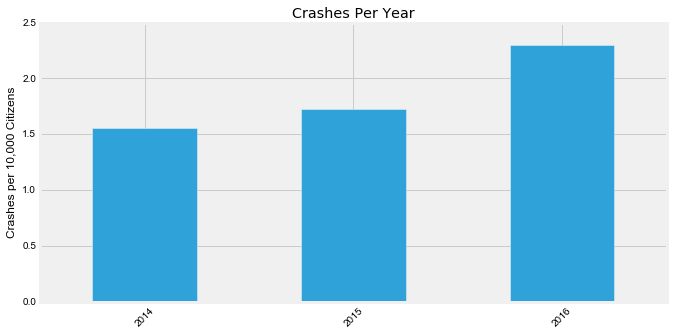

In [151]:
crash_per_10000_people = crash_per_year / (populations[0] / 10000)
crash_per_10000_people.plot(kind='bar', rot=45, title="Crashes Per Year", figsize=(10,5))
plt.ylabel("Crashes per 10,000 Citizens")
plt.show()


# bike crashes are increasing

Is it a trend with a certain type of crash?  


At this point it seems that crashes are increasing, or reports are increasing.  Lets try to look at subgroups of crashes over time and see if they are also increasing at the same rate.

0.15217391304347827

0.42857142857142855

0.30434782608695654

0.16326530612244897

In [203]:
43/15

2.8666666666666667